# ***Projeto 1 - Ciência dos Dados***
###### Tiago Niemeyer Bergamo dos Santos - 2C Engenharia

### ***Análise do IDH, acesso ao saneamento básico e índice de percepção de corrupção***


**Introdução**

Esse projeto busca responder a pergunta **como que a percepção de corrupção e o acesso ao saneamento básico influenciam ou se relacionam com o Índice de Desenvolvimento Humano?** Esse questionamento visa entender se a **corrupção** pode interferir no desenvolvimento de um país e se o **acesso ao saneamento básico** é uma variável que está relacionada ao mesmo desenvolvimento. Entre as razões para as duas varíaveis citadas terem sido escolhidas, está a curiosidade de entender o quanto a corrupção pode afetar uma nação, e ver se existem nações corruptas desenvolvidas. Além disso, em tentar entender se o acesso ao saneamento báscio é um fator de grande importância e quanto ele pode afetar, caso ele esteja em falta.

A partir da pergunta formatada, algumas das respostas que são esperadas, é se a corrupção é predominante em países sub-desenvolvidos e emergentes, se existe algum vínculo concreto entre o IDH e o Acesso ao Saneamento Básico (ASB), assim como um entre o Índice de Percepção de Corrupção (ICP).

# **Como que a percepção de corrupção e o acesso ao saneamento básico influenciam ou se relacionam com o índice de desenvolvimento humano?**

## 1. Importando as bibliotecas, arquivos e criação do DataFrame

In [53]:
#Importando

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import math as math
from scipy import stats
import matplotlib.pyplot as plt

Leitura dos arquivos adquiridos do Gapminder, os quais estão salvos em excel:

In [54]:
#Leitura dos arquivos em Excel

IDH = pd.read_excel("hdi_human_development_index.xlsx")
landlocked = pd.read_excel('landlocked_region.xlsx')
CP = pd.read_excel("corruption_perception_index_cpi.xlsx")
BS = pd.read_excel("basic_sanitation_overall_percentage.xlsx")

Visualização dos dados de cada variável, como a do IDH (Índice Desenvolvimento Humano):

In [55]:
IDH.head(3)

geo   1990   1991   1992   1993   1994   1995   1996   1997   1998  \
0  Afghanistan  0.295  0.300  0.309  0.305  0.300  0.324  0.328  0.332  0.335   
1      Albania  0.635  0.618  0.603  0.608  0.616  0.628  0.637  0.636  0.646   
2      Algeria  0.577  0.581  0.587  0.591  0.595  0.600  0.609  0.617  0.627   

   ...     2006   2007   2008   2009   2010   2011   2012   2013   2014   2015  
0  ...    0.415  0.433  0.434  0.448  0.454  0.463  0.470  0.476  0.479  0.479  
1  ...    0.703  0.713  0.721  0.725  0.738  0.752  0.759  0.761  0.762  0.764  
2  ...    0.690  0.697  0.705  0.714  0.724  0.732  0.737  0.741  0.743  0.745  

[3 rows x 27 columns]

Seleção de um ano para realizar a análise de dados. O ano escolhido foi 2015.

In [56]:
#Seleção do ano para os dados

IDH_2015 = IDH.loc[:, ["geo", 2015]]
CP_2015 = CP.loc[:, ["geo", 2015]]
BS_2015 = BS.loc[:, ["geo", 2015]]

IDH_2013 = IDH.loc[:, ["geo", 2013]]
IDH_2014 = IDH.loc[:, ["geo", 2014]]

CP_2013 = CP.loc[:, ["geo", 2013]]
CP_2014 = CP.loc[:, ["geo", 2014]]

BS_2013 = BS.loc[:, ["geo", 2013]]
BS_2014 = BS.loc[:, ["geo", 2014]]

In [57]:
IDH_2015.head(3)

geo   2015
0  Afghanistan  0.479
1      Albania  0.764
2      Algeria  0.745

Criação de um índice para cada variável e junção dos mesmos em um único DataFrame:

In [58]:
#Criando o índice de cada variável

IDH_2015_idx = IDH_2015.set_index("geo")
CP_2015_idx = CP_2015.set_index("geo")
BS_2015_idx = BS_2015.set_index("geo")
land_idx = landlocked.set_index('Country')

IDH_2013_idx = IDH_2013.set_index("geo")
CP_2013_idx = CP_2013.set_index("geo")
BS_2013_idx = BS_2013.set_index("geo")

IDH_2014_idx = IDH_2014.set_index("geo")
CP_2014_idx = CP_2014.set_index("geo")
BS_2014_idx = BS_2014.set_index("geo")

In [59]:
#Juntando as variáveis

df = IDH_2015_idx.join(CP_2015_idx, how='inner', lsuffix='_IDH', rsuffix='_corruption')
data = df.join(BS_2015_idx, how="inner", lsuffix="_sanitation", )
data = data.rename(index=str, columns={2015:"2015_sanitation"})


df2 = IDH_2013_idx.join(CP_2013_idx, how='inner', lsuffix='_IDH', rsuffix='_corruption')
data2 = df2.join(BS_2013_idx, how="inner", lsuffix="_sanitation", )
data2 = data2.rename(index=str, columns={2013:"2013_sanitation"})


df3 = IDH_2014_idx.join(CP_2014_idx, how='inner', lsuffix='_IDH', rsuffix='_corruption')
data3 = df3.join(BS_2014_idx, how="inner", lsuffix="_sanitation", )
data3 = data3.rename(index=str, columns={2014:"2014_sanitation"})

In [60]:
data.sort_values(by="2015_sanitation", ascending=False).head(5)

2015_IDH  2015_corruption  2015_sanitation
geo                                                             
New Zealand              0.915             91.0            100.0
Bahrain                  0.824             51.0            100.0
United Arab Emirates     0.840             70.0            100.0
Uzbekistan               0.701             19.0            100.0
Kuwait                   0.800             49.0            100.0

In [61]:
data[(data["2015_sanitation"] > 80) & (data["2015_IDH"] < 0.75)]

2015_IDH  2015_corruption  2015_sanitation
geo                                                                       
Algeria                            0.745             36.0             87.5
Armenia                            0.743             35.0             91.6
Colombia                           0.727             37.0             84.4
Dominican Republic                 0.722             33.0             82.7
Ecuador                            0.739             32.0             86.1
Egypt                              0.691             36.0             93.2
El Salvador                        0.680             39.0             91.1
Guyana                             0.638             29.0             86.2
Iraq                               0.649             16.0             85.7
Jamaica                            0.730             41.0             85.4
Jordan                             0.742             53.0             96.7
Kyrgyz Republic                    0.664             28.0             96.6
Libya                              0.716             16.0             99.7
Macedonia, FYR                     0.748             42.0             90.9
Maldives                           0.701              NaN             95.9
Morocco                            0.647             36.0             83.5
Paraguay                           0.693             27.0             91.2
St. Lucia                          0.735              NaN             90.9
St. Vincent and the Grenadines     0.722              NaN             87.2
Syria                              0.536             18.0             92.9
Tajikistan                         0.627             26.0             95.5
Thailand                           0.740             38.0             95.0
Tunisia                            0.725             38.0             93.1
Turkmenistan                       0.692             18.0             96.6
Ukraine                            0.743             27.0             95.9
Uzbekistan                         0.701             19.0            100.0

In [62]:
correlation = data.corr(method="pearson", min_periods=1)
correlation

2015_IDH  2015_corruption  2015_sanitation
2015_IDH         1.000000         0.736817         0.885724
2015_corruption  0.736817         1.000000         0.537704
2015_sanitation  0.885724         0.537704         1.000000

# *Início das Análises*

# **2. Análise do IDH de 2015**

Text(0,0.5,'IDH')

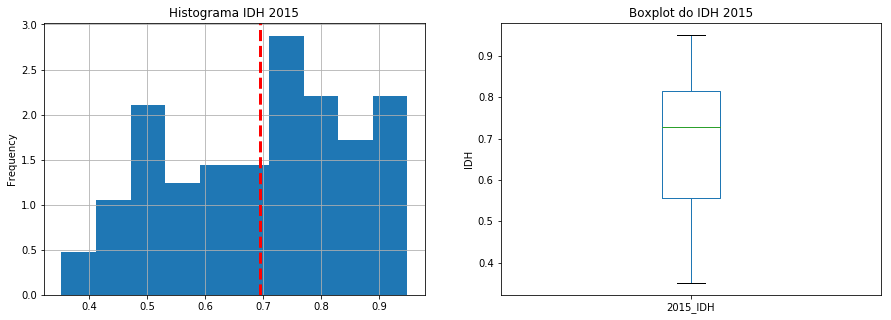

In [63]:
f= plt.figure(figsize=(15,5))
plt.subplot(121)
data["2015_IDH"].plot(kind="hist", density=True);
plt.axvline(data["2015_IDH"].mean(), color='r', linestyle='dashed', linewidth=3)
plt.title("Histograma IDH 2015")
plt.grid(True)

plt.subplot(122)
data.loc[:, "2015_IDH"].plot.box()
plt.title("Boxplot do IDH 2015")
plt.ylabel("IDH")

A partir dos dois gráficos acima, o primeiro sendo um histograma e o segundo sendo um Boxplot, ambos do IDH de 2015, já é possível inferir algumas informações. Analisando o primeiro gráfico, pode-se perceber pela mediana, linha pontilhada vermelha, que mais da metade das nações possui um IDH acima de 0.7, podendo se inferir que a maior parte dos países é desenvolvido ou está em processo de desenvolvimento, como o Brasil. Além disso, é possível analisar que existe uma maior frequencia de países com IDH entre 0.7 e 0.8, mostrando que a quantidade de países desenvolvidos é baixa, ao comparar com o resto. 

A partir do estudo dos dois gráficos juntos, pode-se perceber que mesmo havendo menos países menos desenvolvidos, a diferença de IDH entre eles é muito maior, algo que pode ser visto no tamanho da cauda do Boxplot na parte de baixo e pela assimetria negativa no histograma. Esses dados permitem inferir que existe uma grande diferença de desenvolvimento entre as nações, havendo diversos países na miséria, alguns com alto desenvolvimento e uma maioria em processo de progresso.

# **3. Análise do Índice de Percepção de Corrupção X IDH**

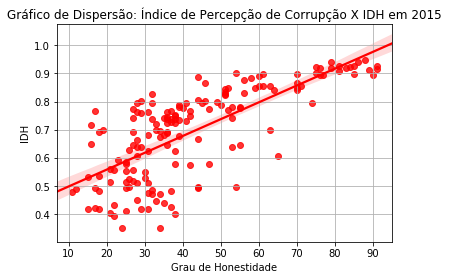

In [64]:
sns.regplot(data["2015_corruption"], data["2015_IDH"], color="r")
plt.title("Gráfico de Dispersão: Índice de Percepção de Corrupção X IDH em 2015")
plt.xlabel("Grau de Honestidade")
plt.ylabel("IDH")
plt.grid(True)

Primeiramente é necessário explicar a segunda variável, Índice de Percepção de Corrupção, já que a mesma é contra-intuitiva. Esta ordena os países do mundo pelo grau de corrupção que é percebida a existir nos setores públicos. O índice da uma pontuação para cada país, sendo 100 a mais baixa e 0 a mais alta, quanto mais perto de 0, mais corrupto a nação aparenta ser e quanto mais próximo de 100, mais honesto. Para facilitar o entendimento, a legenda Grau de Honestidade foi criada para este estudo, quanto mais alto o valor, mais honesto o país é.

Observando o gráfico de Disperão exposto acima, Percepção de Corrupção X IDH, pode-se dizer que países com um maior índice de desenvolvimento detêm uma pontuação mais baixa em relação a percepção de corrupção, ao contrário dos países com um menor IDH, os quais possuem uma pontuação mais alta da segunda variável analisada. Além disso, pode-se observar países com um IDH razoável tem uma percepção de corrupção quase alta, alguns exemplos são Venezuela, Uzbekistan e Russia, os quais possuem um IDH acima de 0.7 e ICP menor de 30, sendo o dos dois primeiros menor que 20. Isso apresenta que mesmo havendo uma tendência de países desenvolvidos serem mais honestos, existem países que são exceções desse caso, como os três citados.

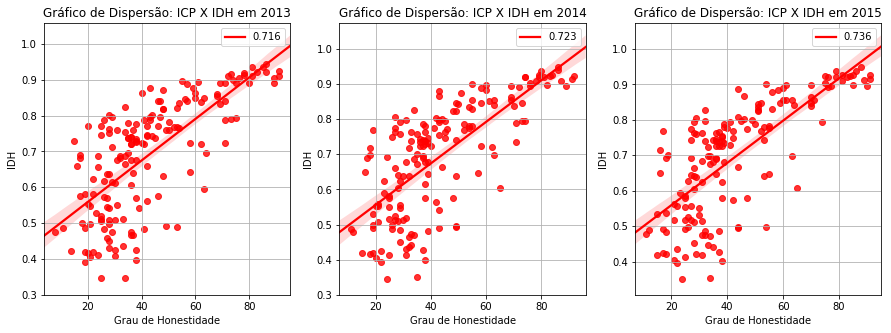

In [65]:
f= plt.figure(figsize=(15,5))
plt.subplot(131)
corr1 = data2["2013_corruption"].corr(data2["2013_IDH"])
sns.regplot(data2["2013_corruption"], data2["2013_IDH"], color="r")
plt.title("Gráfico de Dispersão: ICP X IDH em 2013")
plt.xlabel("Grau de Honestidade")
plt.ylabel("IDH")
plt.legend([str(corr1)[:5]])
plt.grid(True)

plt.subplot(132)
corr2 = data3["2014_corruption"].corr(data3["2014_IDH"])
sns.regplot(data3["2014_corruption"], data3["2014_IDH"], color="r")
plt.title("Gráfico de Dispersão: ICP X IDH em 2014")
plt.xlabel("Grau de Honestidade")
plt.ylabel("IDH")
plt.legend([str(corr2)[:5]])
plt.grid(True)

plt.subplot(133)
corr3 = data["2015_corruption"].corr(data["2015_IDH"])
sns.regplot(data["2015_corruption"], data["2015_IDH"], color="r")
plt.title("Gráfico de Dispersão: ICP X IDH em 2015")
plt.xlabel("Grau de Honestidade")
plt.ylabel("IDH")
plt.legend([str(corr3)[:5]])
plt.grid(True)

Após analisar a situação no ano de 2015 sobre a corrupção e o IDH, buscou-se ver se o mesmo padrão existia em outros anos. A partir dos gráficos de dispersão de cada ano e da reta MMQ, é possível observar que não há nenhuma grande mudança nos dados. Além disso, pode-se ver que o índice de correlação é quase inalterável, indicando uma alteração quase nula no decorrer destes 3 anos. 

Text(0.5,1,'Boxplot do Índice de Percapção de Corrupção 2015')

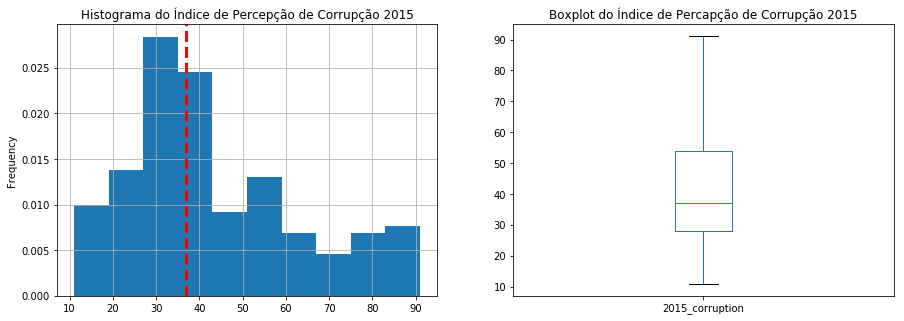

In [66]:
f= plt.figure(figsize=(15,5))
plt.subplot(121)
data["2015_corruption"].plot(kind="hist", density=True);
plt.axvline(data["2015_corruption"].median(), color='r', linestyle='dashed', linewidth=3)
plt.title("Histograma do Índice de Percepção de Corrupção 2015")
plt.grid(True)

plt.subplot(122)
data.loc[:, "2015_corruption"].plot.box()
plt.title("Boxplot do Índice de Percapção de Corrupção 2015")

Analisando os dois gráficos acima, um Histograma e um Boxplot, ambos sobre o Índice de Percepção de Corrupção, pode-se observar por meio da mediana, linha pontilhada vermelha, que mais metade dos países estudados tem um alto índice de corrupção, podendo se inferir que vivemos em uma época dominada pela corrupção ou que os países considerados honestos, tem uma visão predominante sobre eles. O resto das nações, lado direito da mediana, não tem um ICP tão predominate, havendo uma maior variação, sendo esta bem menor do que a primeira metade observada. Esse fato pode ser enfatizado ao ver o boxplot e sua longa cauda acima do terceiro quartil e a assimetria positiva no histograma.

# **4. Análise do Acesso ao Saneamento Básico X IDH**

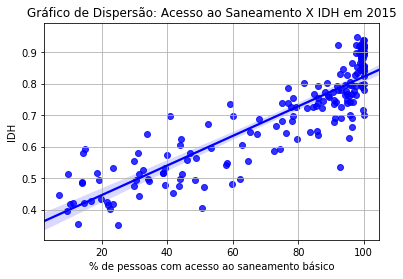

In [67]:
#data.plot.scatter(x='2015_sanitation',y='2015_IDH');
sns.regplot(data["2015_sanitation"], data["2015_IDH"], color="b")
plt.title("Gráfico de Dispersão: Acesso ao Saneamento X IDH em 2015")
plt.xlabel("% de pessoas com acesso ao saneamento básico")
plt.ylabel("IDH")
plt.grid(True)

Ao observar o gráfico de dispersão acima, o qual é composto pelas variáveis Acesso a Saneameto Básico e IDH, pode-se dizer que há uma tendência em países desenvolvidos terem um grande acesso ao saneamento básico, assim como o contrário. Entretanto, nações que possuem um IDH não considerado tão alto, como 0.7 e 0.5, Maldivas e Siria, respectivamente, detem quase 100% de acesso ao saneamento báscio. Novamente, em frente a uma predÔminancia, existem países que se encontram fora da mesma.

In [68]:
f= plt.figure(figsize=(15,5))
plt.subplot(131)
corr4 = data2["2013_sanitation"].corr(data2["2013_IDH"])
sns.regplot(data2["2013_sanitation"], data2["2013_IDH"], color="b")
plt.title("Gráfico de Dispersão: ASB X IDH em 2013")
plt.xlabel("% de pessoas com acesso ao saneamento básico")
plt.ylabel("IDH")
plt.legend([str(corr4)[:5]])
plt.grid(True)

plt.subplot(132)
corr5 = data3["2014_sanitation"].corr(data3["2014_IDH"])
sns.regplot(data3["2014_sanitation"], data3["2014_IDH"], color="b")
plt.title("Gráfico de Dispersão: ASB X IDH em 2014")
plt.xlabel("% de pessoas com acesso ao saneamento básico")
plt.ylabel("IDH")
plt.legend([str(corr5)[:5]])
plt.grid(True)

plt.subplot(133)
corr6 = data["2015_sanitation"].corr(data["2015_IDH"])
sns.regplot(data["2015_sanitation"], data["2015_IDH"], color="b")
plt.title("Gráfico de Dispersão: ASB X IDH em 2015")
plt.xlabel("% de pessoas com acesso ao saneamento básico")
plt.ylabel("IDH")
plt.legend([str(corr6)[:5]])
plt.grid(True)

Depois de estudar o caso no ano de 2015 sobre o acesso ao saneamento básico e o IDH, é possível observar que a tendência continuou igual desde 2013. O índice de correlação, fortifica o afirmado, já que o mesmo teve uma variação apenas na segunda casa decimal, o que pode ser considerado uma alteração quase nula, olhando a situação de forma geral. 

In [69]:
f= plt.figure(figsize=(15,5))
plt.subplot(121)
data["2015_sanitation"].plot(kind="hist", density=True);
plt.axvline(data["2015_sanitation"].mean(), color='r', linestyle='dashed', linewidth=3)
plt.title("Histograma do Acesso ao Saneamento 2015")
plt.grid(True)

plt.subplot(122)
data.loc[:, "2015_sanitation"].plot.box()
plt.title("Boxplot do Acesso ao Saneamento 2015")

Text(0.5,1,'Boxplot do Acesso ao Saneamento 2015')

Observando os dois gráficos acima, um histograma e um Boxplot, ambos sobre o acesso ao saneamento básico em 2015, é possível inferir a partir da mediana, linha pontilhada vermelha, que 50% dos países possui um alto acesso ao saneamento básico (acima de 70%). A outra metade dos países, tem uma maior variação de acesso entre si próprios e a primeira metade de nações estudada. Isso pode ser reforçado pela longa cauda observada abaixo do primeiro quartil no Boxplot. Além disso, a longa cauda e o formato do histograma indicam uma assimetria negativa nos dados. A partir dos formatos dos gráficos e dos dados, pode-se dizer que mesmo a quantidade de países com baixo acesso ao saneamento básico, eles são importantes dados que poderiam receber um estudo mais focado, para entender os possíveis motivos para haver uma difernça tão grande entre eles e as outras nações.

# **5. Análise do Acesso ao Saneamento Básico X Índice de Percepção de Corrupção**

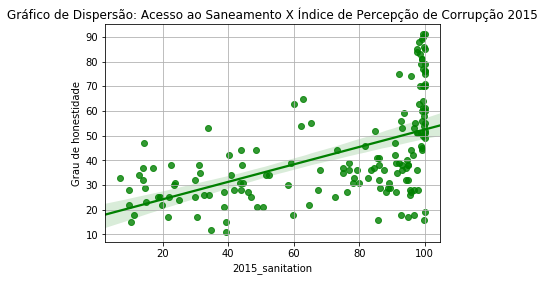

In [70]:
#data.plot.scatter(x='2015_sanitation',y='2015_corruption');
sns.regplot(data["2015_sanitation"], data["2015_corruption"], color="g")
plt.title("Gráfico de Dispersão: Acesso ao Saneamento X Índice de Percepção de Corrupção 2015")
plt.ylabel("Grau de honestidade")
plt.grid(True)

Ao comparar o Índice de Percepção de Corrupção e o Acesso ao Saneamento (ASB) básico no gráfico de dispersão acima, pode-se observar que não há uma forte associação entre eles, já que tanto países mais honestos como corruptos possuem um alto grau de acesso ao saneamento básico. Além disso, caso de a impressão de que os dados possuem uma boa associação, o índice de correlação entre as variáveis é de apenas 0.537. 

In [71]:
f= plt.figure(figsize=(15,5))
plt.subplot(131)
corr7 = data2["2013_sanitation"].corr(data2["2013_corruption"])
sns.regplot(data2["2013_sanitation"], data2["2013_corruption"], color="g")
plt.title("Gráfico de Dispersão: ASB X ICP em 2013")
plt.xlabel("% de pessoas com acesso ao saneamento básico")
plt.ylabel("Grau de Honestidade")
plt.legend([str(corr7)[:5]])
plt.grid(True)

plt.subplot(132)
corr8 = data3["2014_sanitation"].corr(data3["2014_corruption"])
sns.regplot(data3["2014_sanitation"], data3["2014_corruption"], color="g")
plt.title("Gráfico de Dispersão: ASB X ICP em 2014")
plt.xlabel("% de pessoas com acesso ao saneamento básico")
plt.ylabel("Grau de Honestidade")
plt.legend([str(corr8)[:5]])
plt.grid(True)

plt.subplot(133)
corr9 = data["2015_sanitation"].corr(data["2015_corruption"])
sns.regplot(data["2015_sanitation"], data["2015_corruption"], color="g")
plt.title("Gráfico de Dispersão: ASB X ICP em 2015")
plt.xlabel("% de pessoas com acesso ao saneamento básico")
plt.ylabel("Grau de Honestidade")
plt.legend([str(corr9)[:5]])
plt.grid(True)

A partir dos dados estudados do ano de 2015, entre Acesso ao Saneamento Básico e Índice de ´Percepção de Corrupção, para ter um estudo mais aprofundado, buscou-se observar mais dois anos, para descobrir se o observado é uma tendência constante ou o ano era uma anomalia. Com os gráficos de dispersão acima, assim como nas duas outras análises temporais, a diferença entre os anos é mínima, fato comprovado pelos índices de correlação de cada ano.

# **6. Conclusão**

Retomada da pergunta: **Como que a percepção de corrupção e o acesso ao saneamento básico influenciam ou se relacionam com o índice de desenvolvimento humano?**

A partir da análise realizada dos dados e dos gráficos expostos acima, pode se concluir que ambas as variáveis, apresentam uma certa relação com o IDH, porém não são fatores predominantes que determinam o desenvolvimento ou não. O Acesso ao Saneamento Básico é maior em países mais desenvolvidos, entretanto, isso não significa que apenas por estes terem um alto IDH, eles têm um alto acesso a esta infraestrutura, já que diversos países menos desenvolvidos, também o possuem. Um motivo que não pode ser confirmado, é a possibilidade de os países que atualmente são desenvolvidos, alcaçaram este patamar graças ao investimento que realizaram nesta área, visto que com o progresso da mesma, há uma redução na compra de medicamentos (a população adoece com menos frequência) e com uma melhor saúde, as pessoas são capazes de trabalhar mais, gerando um maior poder econômico para a nação. Entretanto, a falta de variáveis e dados, não nos permite confirmar esta nova hípotese. 

Além disso, foi possível observar que a corrupção também tem uma certa influência no IDH, dado que a maioria dos países corruptos, é sub-desenvolvido ou emergente. Entretanto, os dados por si próprios não são capzes de explicar como essas duas variáveis se relacionam, porém, os dados nos permitem associar e inferir o que pode estar por trás. Em certos países, a corrupção impede o desenvolvimento devido ao desvio de dinheiro, direcionando-o para compra de armas ou para a própria conta dos políticos. Dessa forma, infraestruturas essenciais como escola, hospitais, etc., não são construídos, impedindo o progresso que o país poderia ter. Entretanto, essas afirmações não passam de suposições, já que não é possível confirmar, mas é uma relação que faz muito sentido, principalmente observando os dados.

Da mesma forma, a partir do estudo, é plausível dizer que possa existir uma pequena relação entre a corrupção e o Acesso ao Saneamento Básico. Os dados informam que tanto países honestos como corruptos podem possuir um alto ASB, entretanto, há uma tendência das nações mais honestas terem mais do que as mais corruptas. Um motivo para essa relação, é a possível interferência dos governos corruptos em obras de infraestrutura. Existem pesquisas e notícias que informam que existem casos de devios de verba, as quais eram destinadas a melhora do saneamento básico em algumas regiôes. Um exemplo deste acontecimento é no Brasil, onde estes desvios já acarretaram num prejuízo de 4 bilhões de reais, além da falta destas infraestruturas para os moradores.

Por fim, pode se concluir a partir da análise temporal realizada, que a mudança ocorrida entre os anos foi mínima, quase nula. Uma hípotese que pde ser criada a partir desse estudo é que como as variáveis analisadas necessitam de mais anos para causarem um impacto ou alteração na situação geral, 3 anos não foram o suficiente para para causar esta mudança.

Estas observações e análises nos levam a questionar sobre a associação entre estas variáveis. Para um melhor entendimento e um maior aprofundamento destas situações, é necessário um estudo mais focado, analisando mais variáveis e outros anos, afim de tentar compreender como estas variáveis realmente se relacionam, já que as próprias hipóteses criadas a partir dos dados coletados deste estudo podem estar erradas, havendo a possibilidade de que na verdade, uma terceira variável é a causa das relações entre as duas. Estes, são alguns dos possíveis estudos que podem ser investigados em trabalhos futuros.

In [72]:
data.to_csv('Projeto1.csv',index=True)
dados = pd.read_csv("Projeto1.csv", sep=",")